In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import ast
import json
from detection_utils.detections_drawer import generate_bars, draw_intersection

In [ ]:
%cd ..

In [4]:
models = [*filter(lambda z: os.path.exists(os.path.join('workspace','exported_models', z, 'validation_results.csv')), os.listdir('workspace/exported_models'))]

In [5]:
for index,item in enumerate(models):
    print(index,item, sep=": ")

0: centernet_resnet50_v1_fpn_512x512_coco17_tpu-8
1: centernet_resnet50_v2_512x512_coco17_tpu-8
2: efficientdet_d0_coco17_tpu-32
3: faster_rcnn_resnet152_v1_640x640_coco17_tpu-8
4: faster_rcnn_resnet50_v1_640x640_coco17_tpu-8
5: ssd_resnet101_v1_fpn_640x640_coco17_tpu-8
6: ssd_resnet152_v1_fpn_640x640_coco17_tpu-8
7: ssd_resnet50_v1_fpn_640x640_coco17_tpu-8
8: yolov8m_lego_416_bsize_16
9: yolov8n_lego_416_bsize_1
10: yolov8n_lego_416_bsize_16
11: yolov8n_lego_416_bsize_32


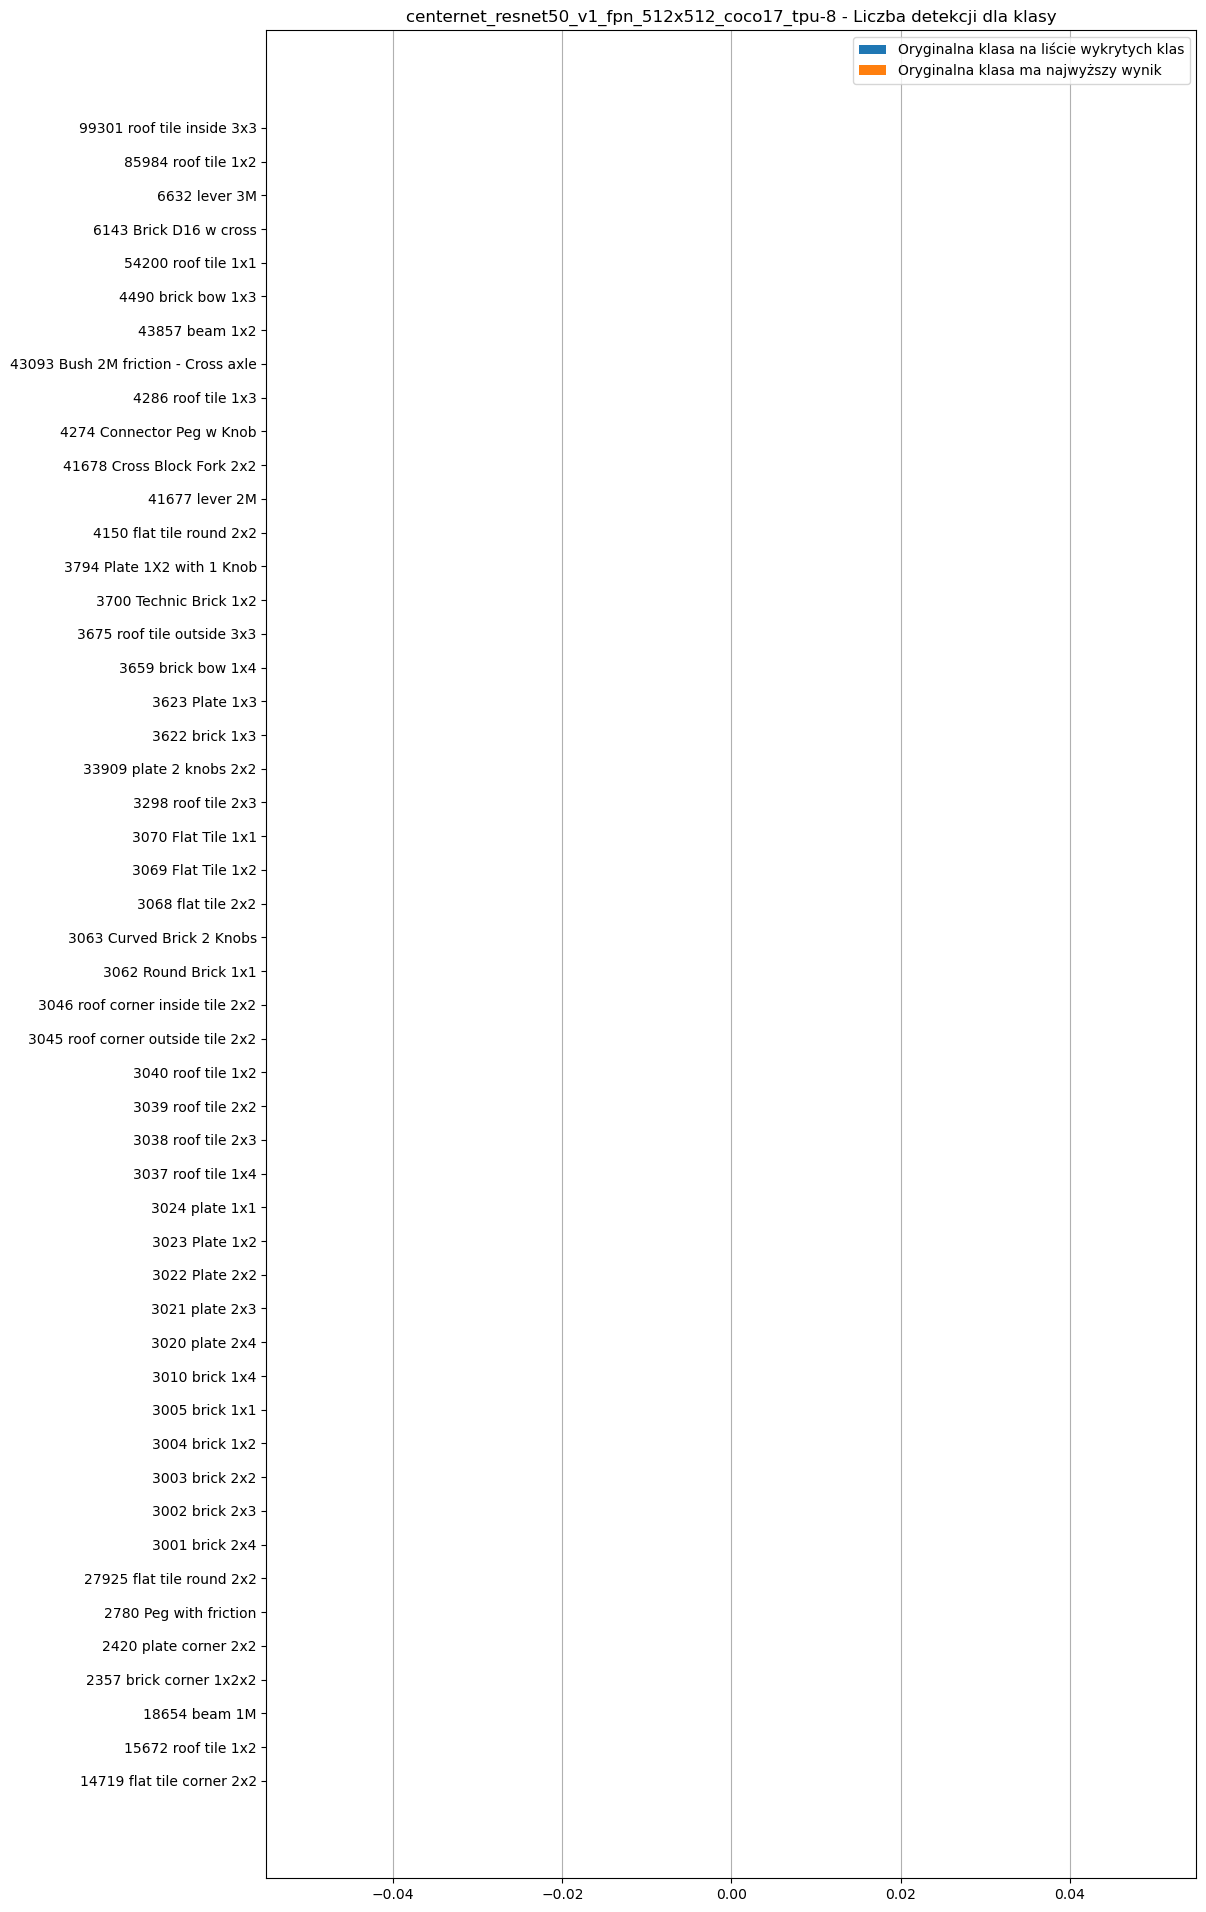

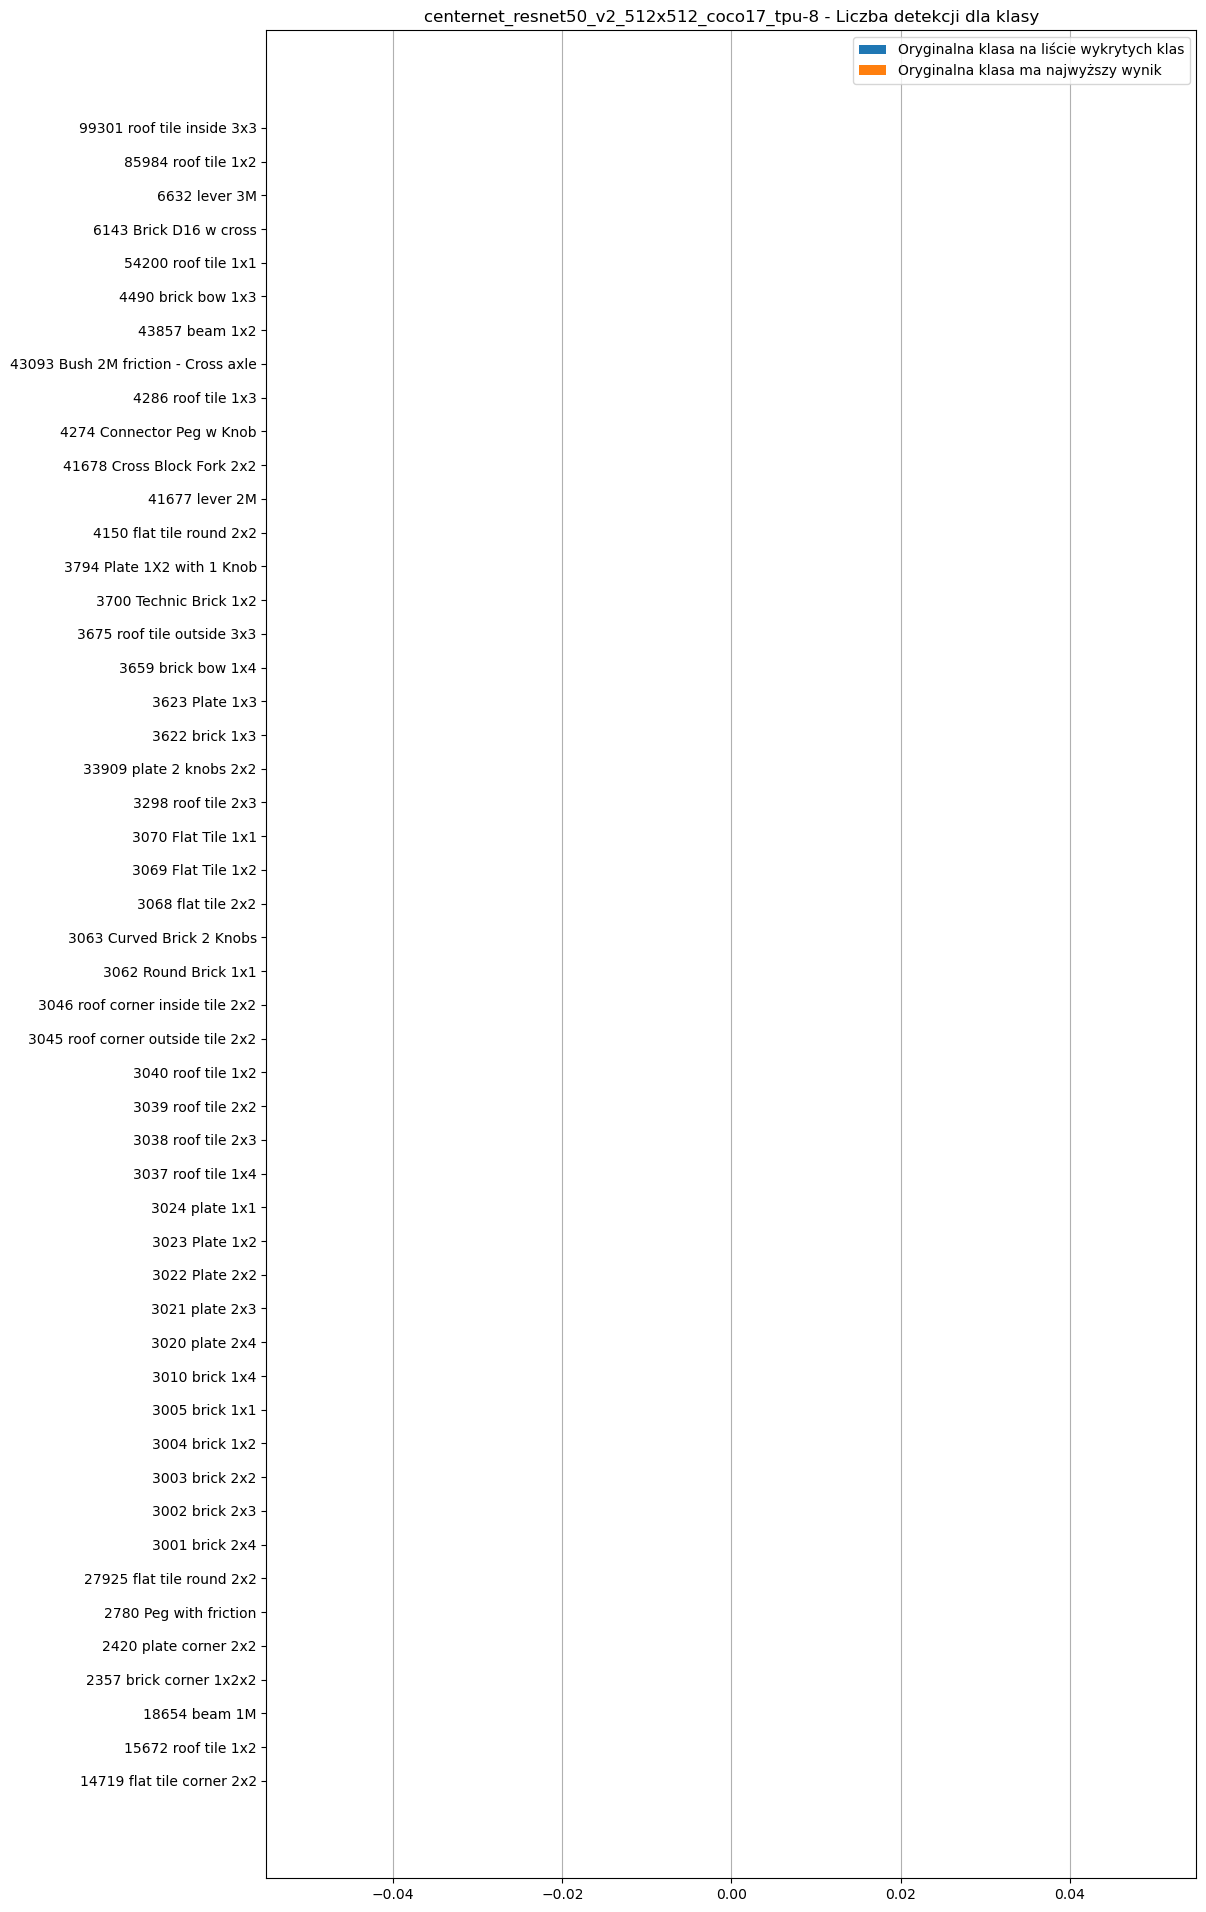

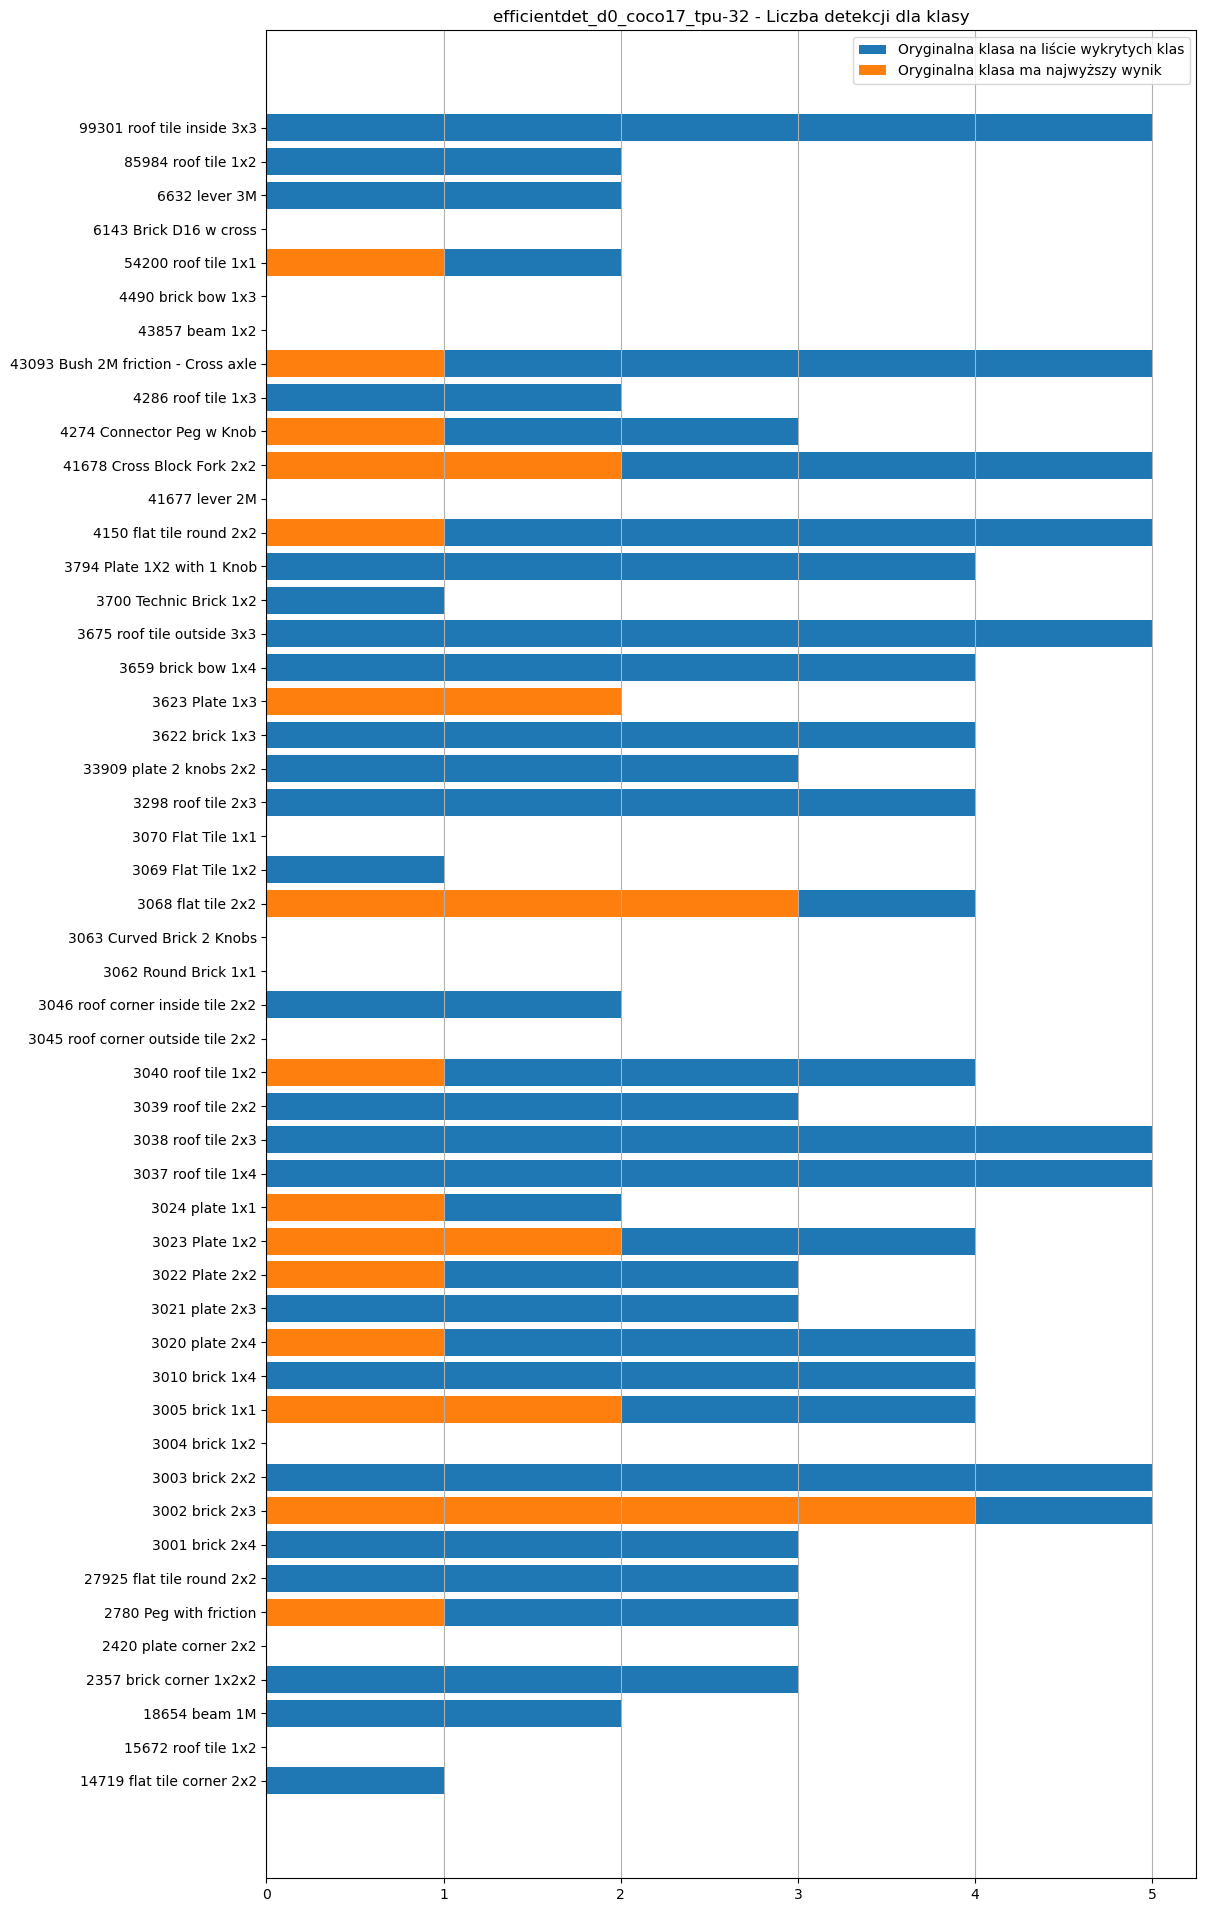

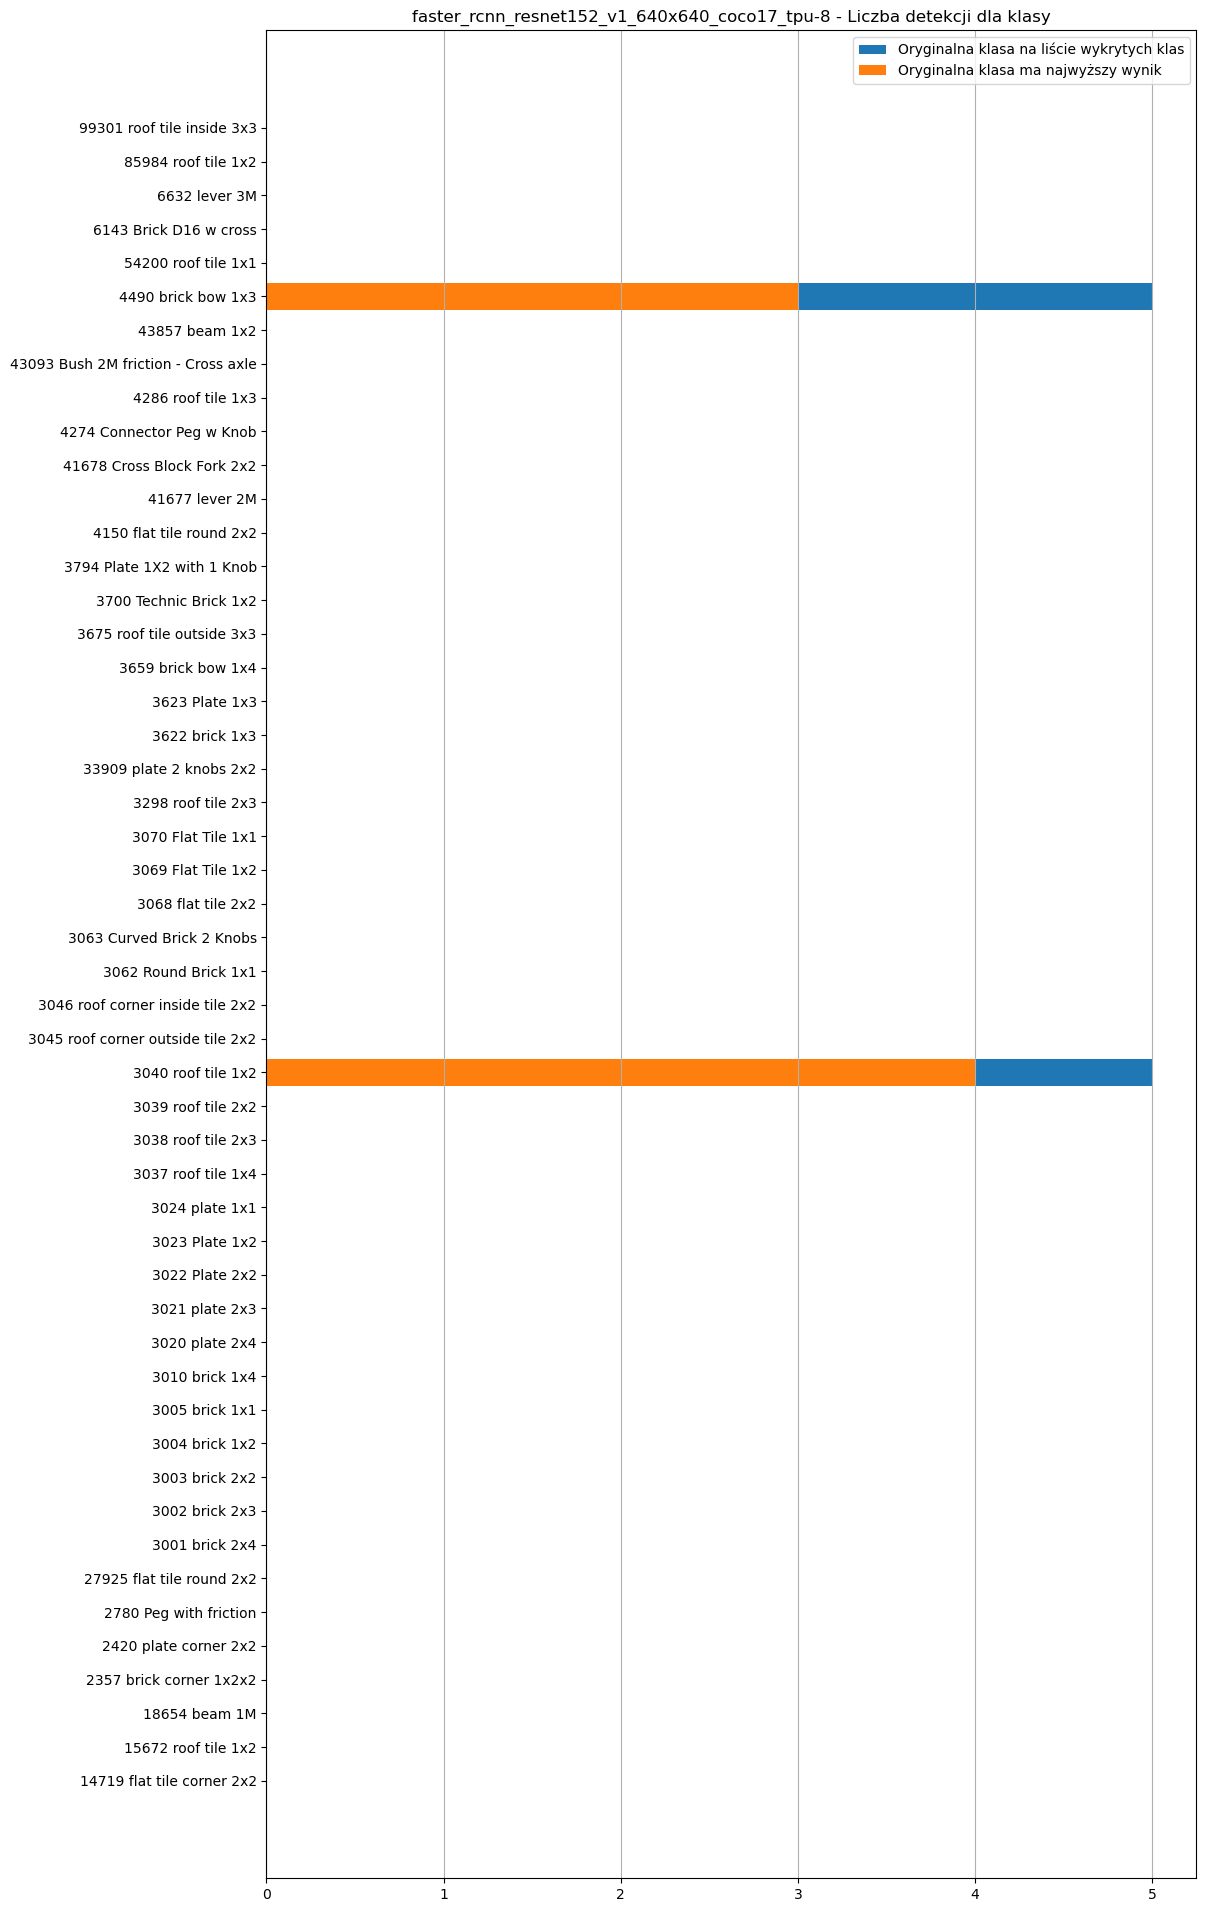

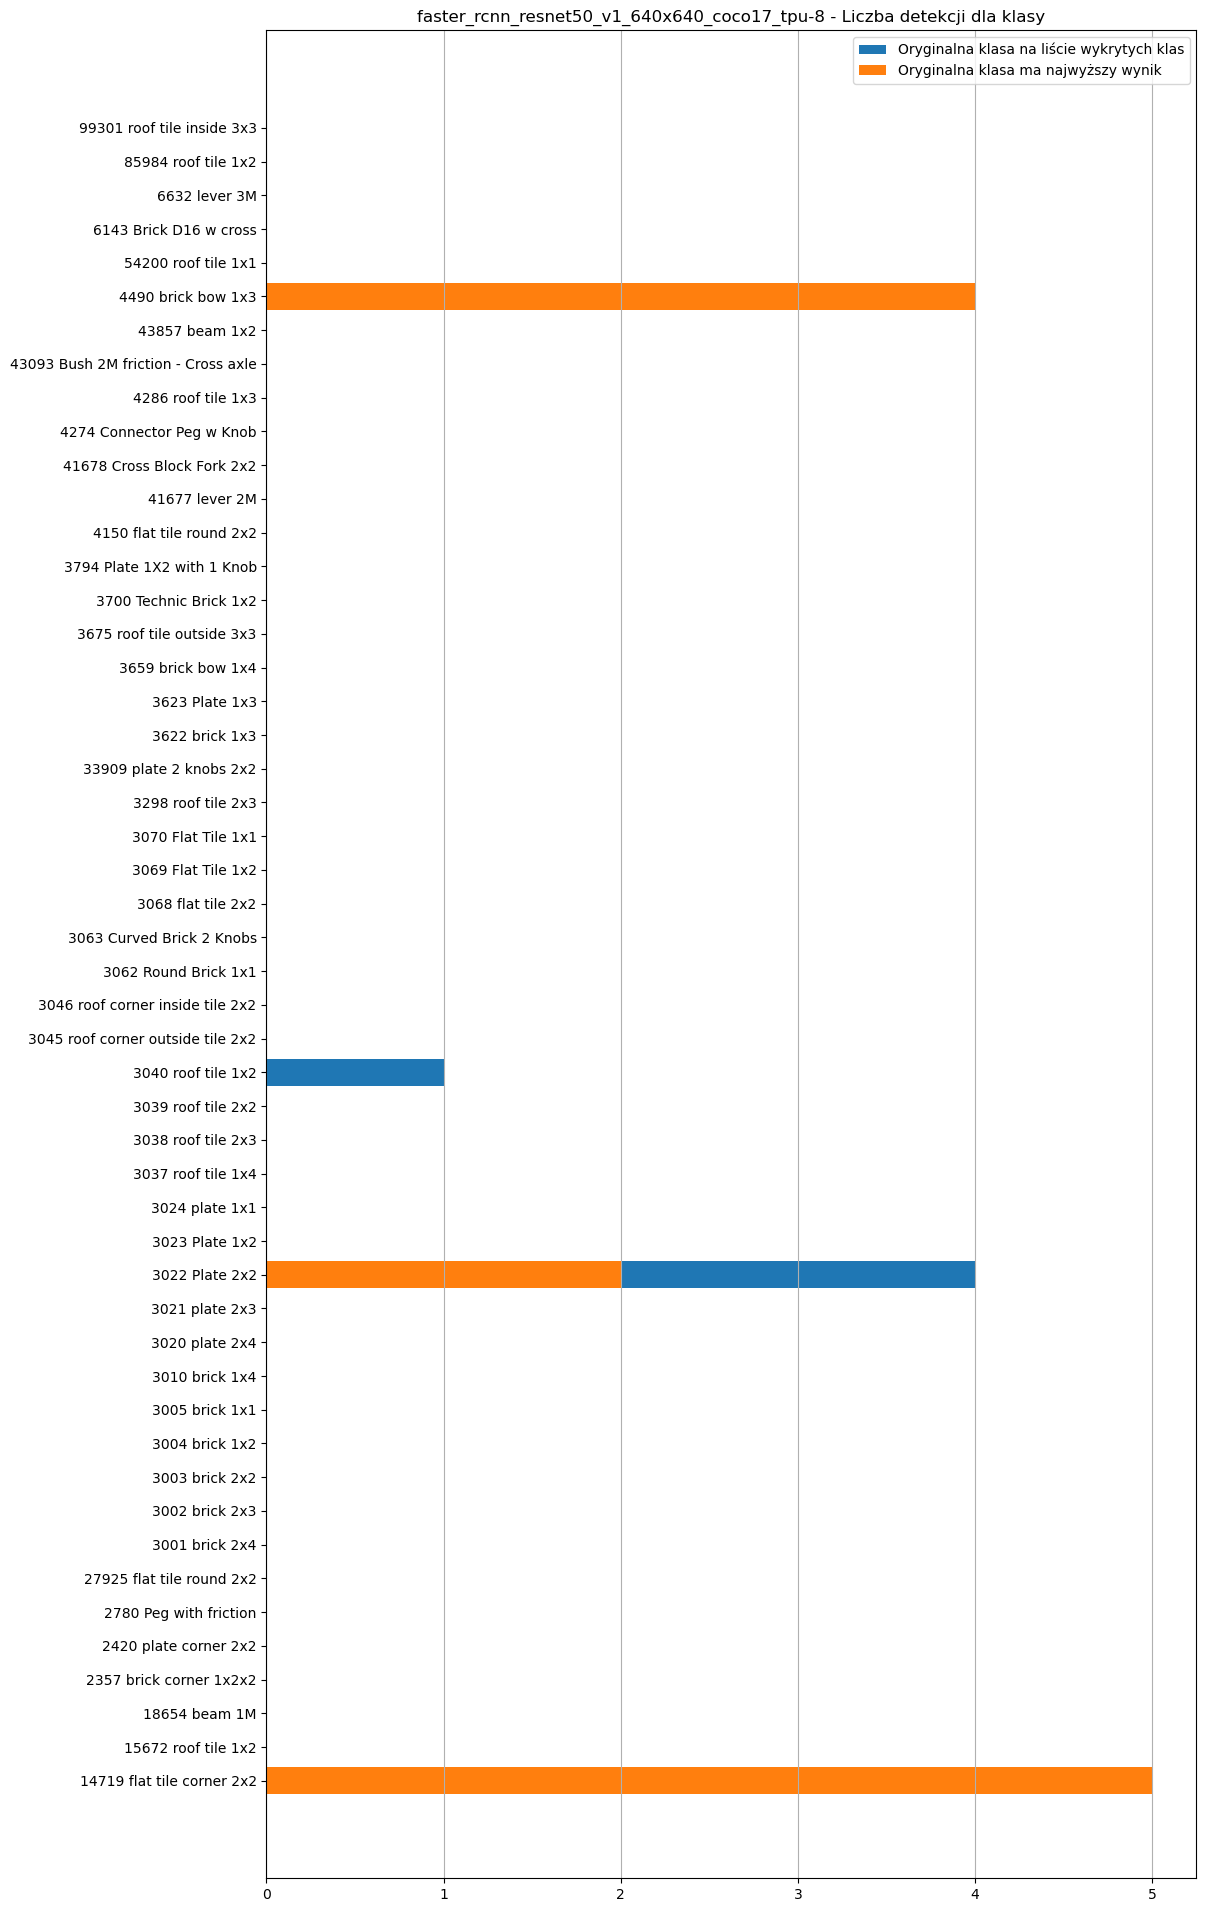

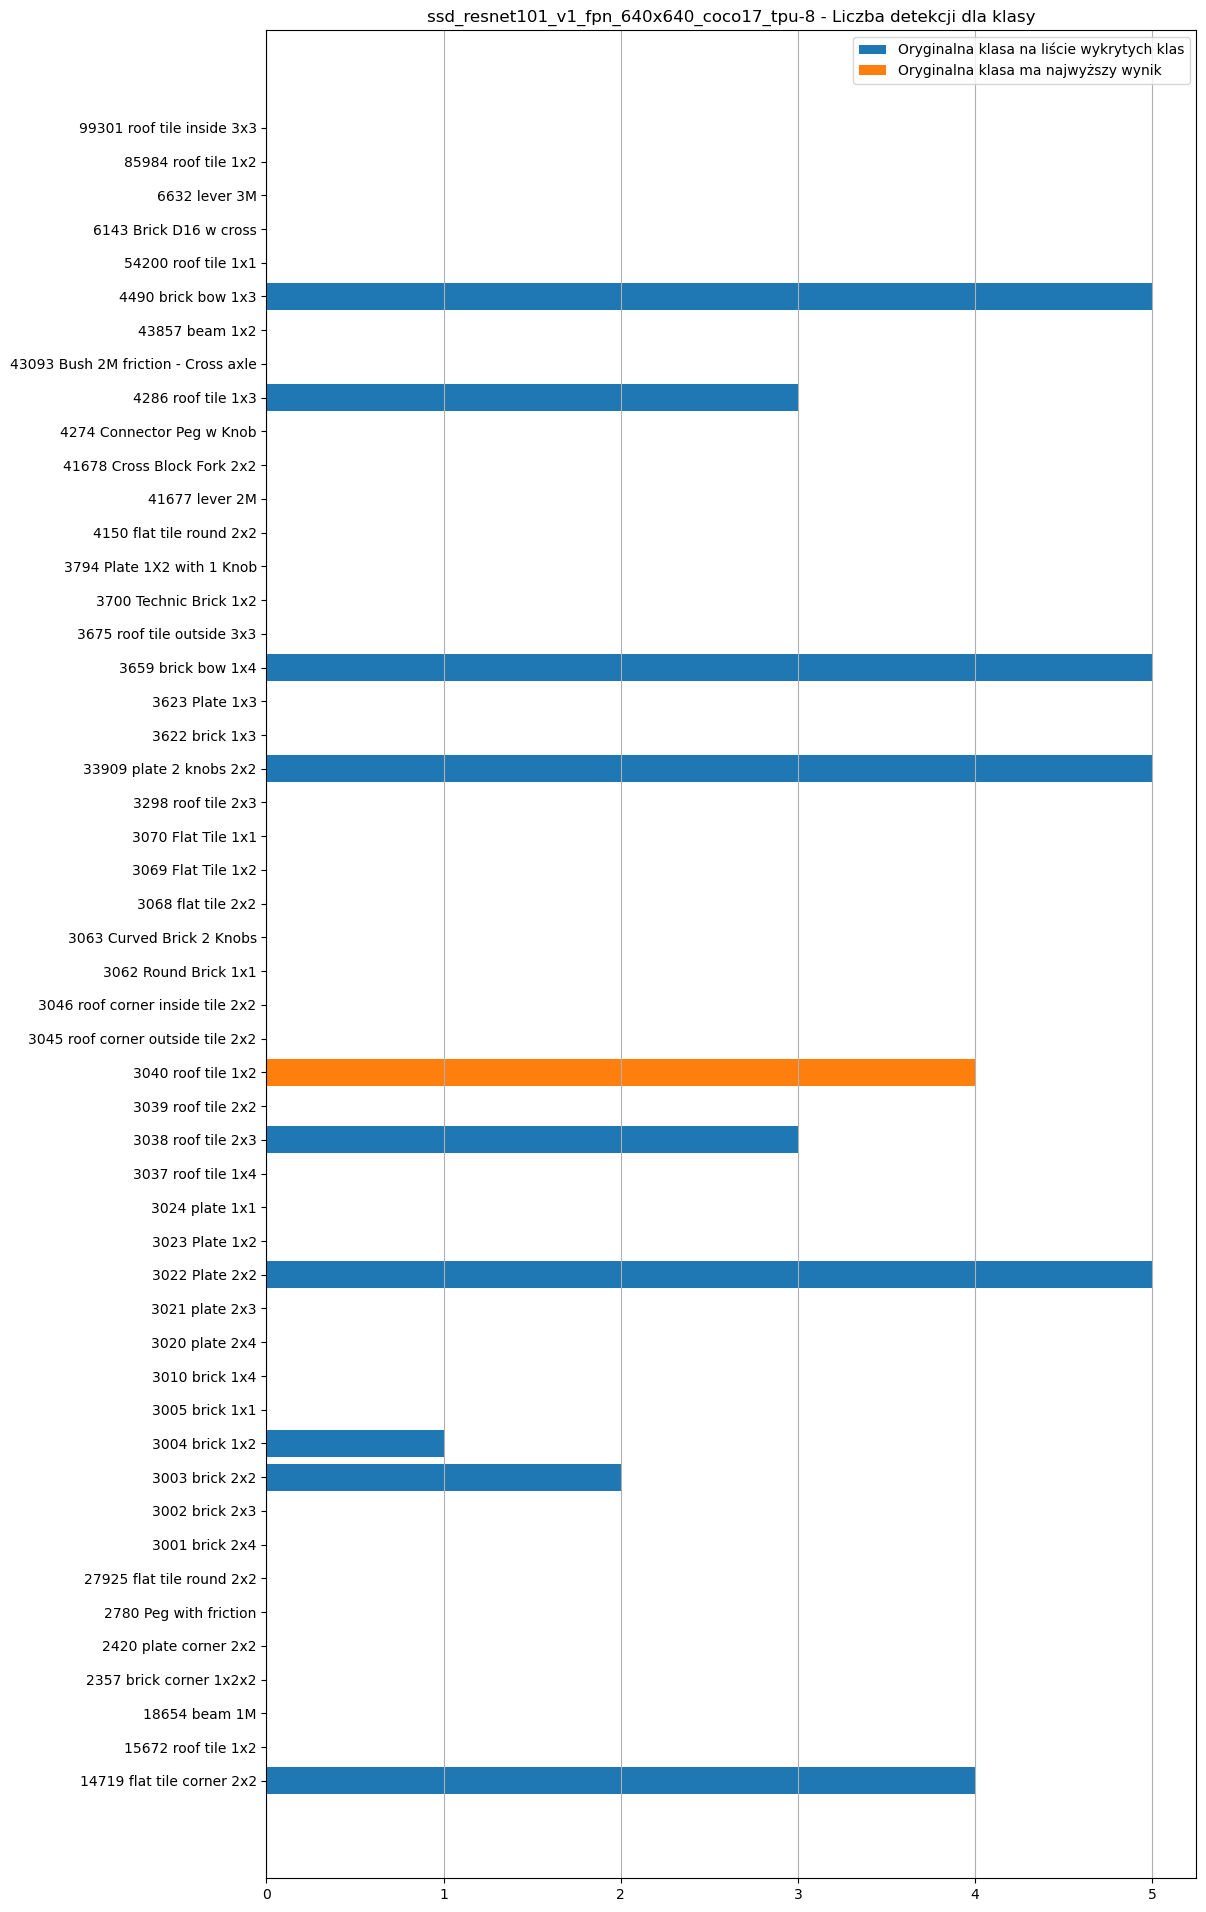

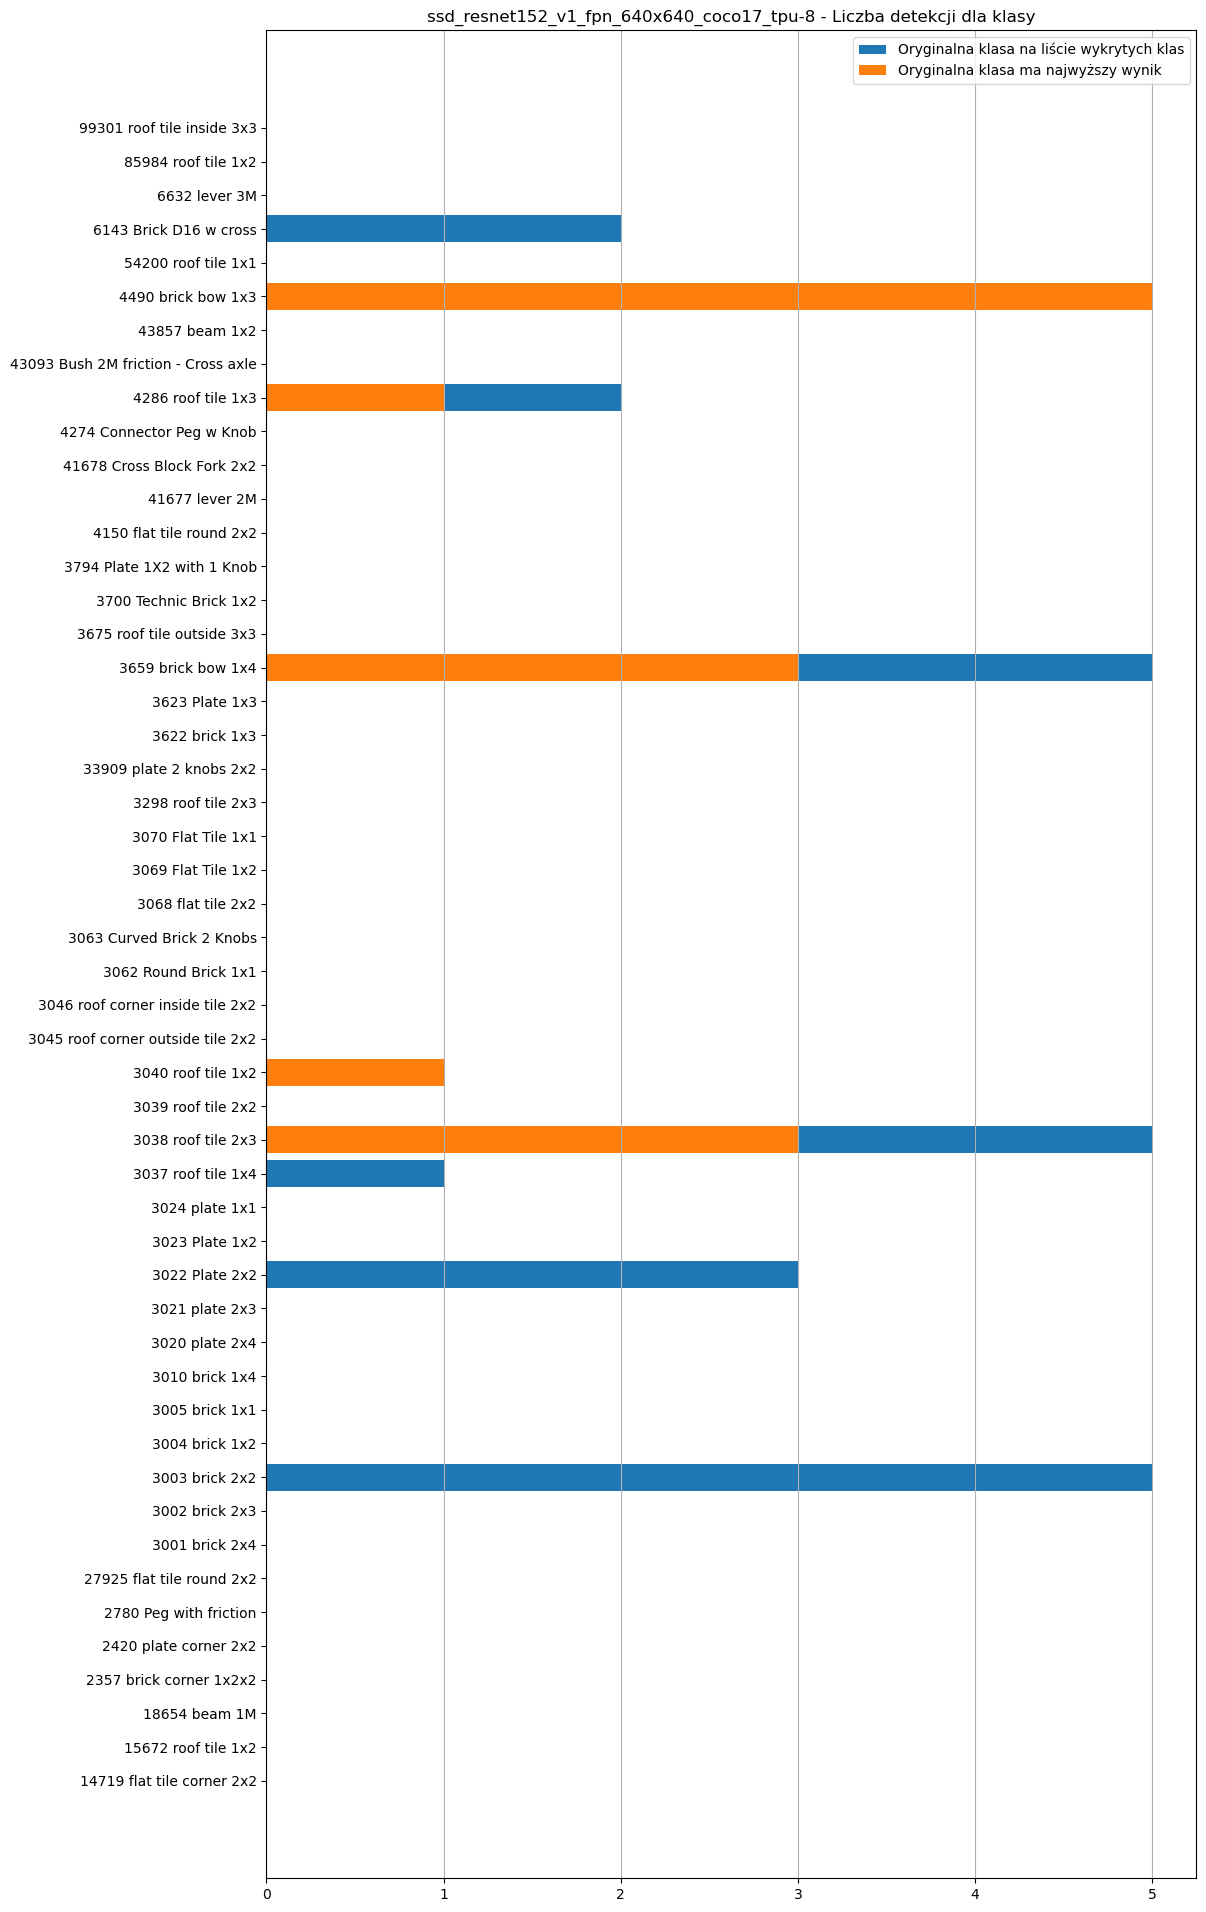

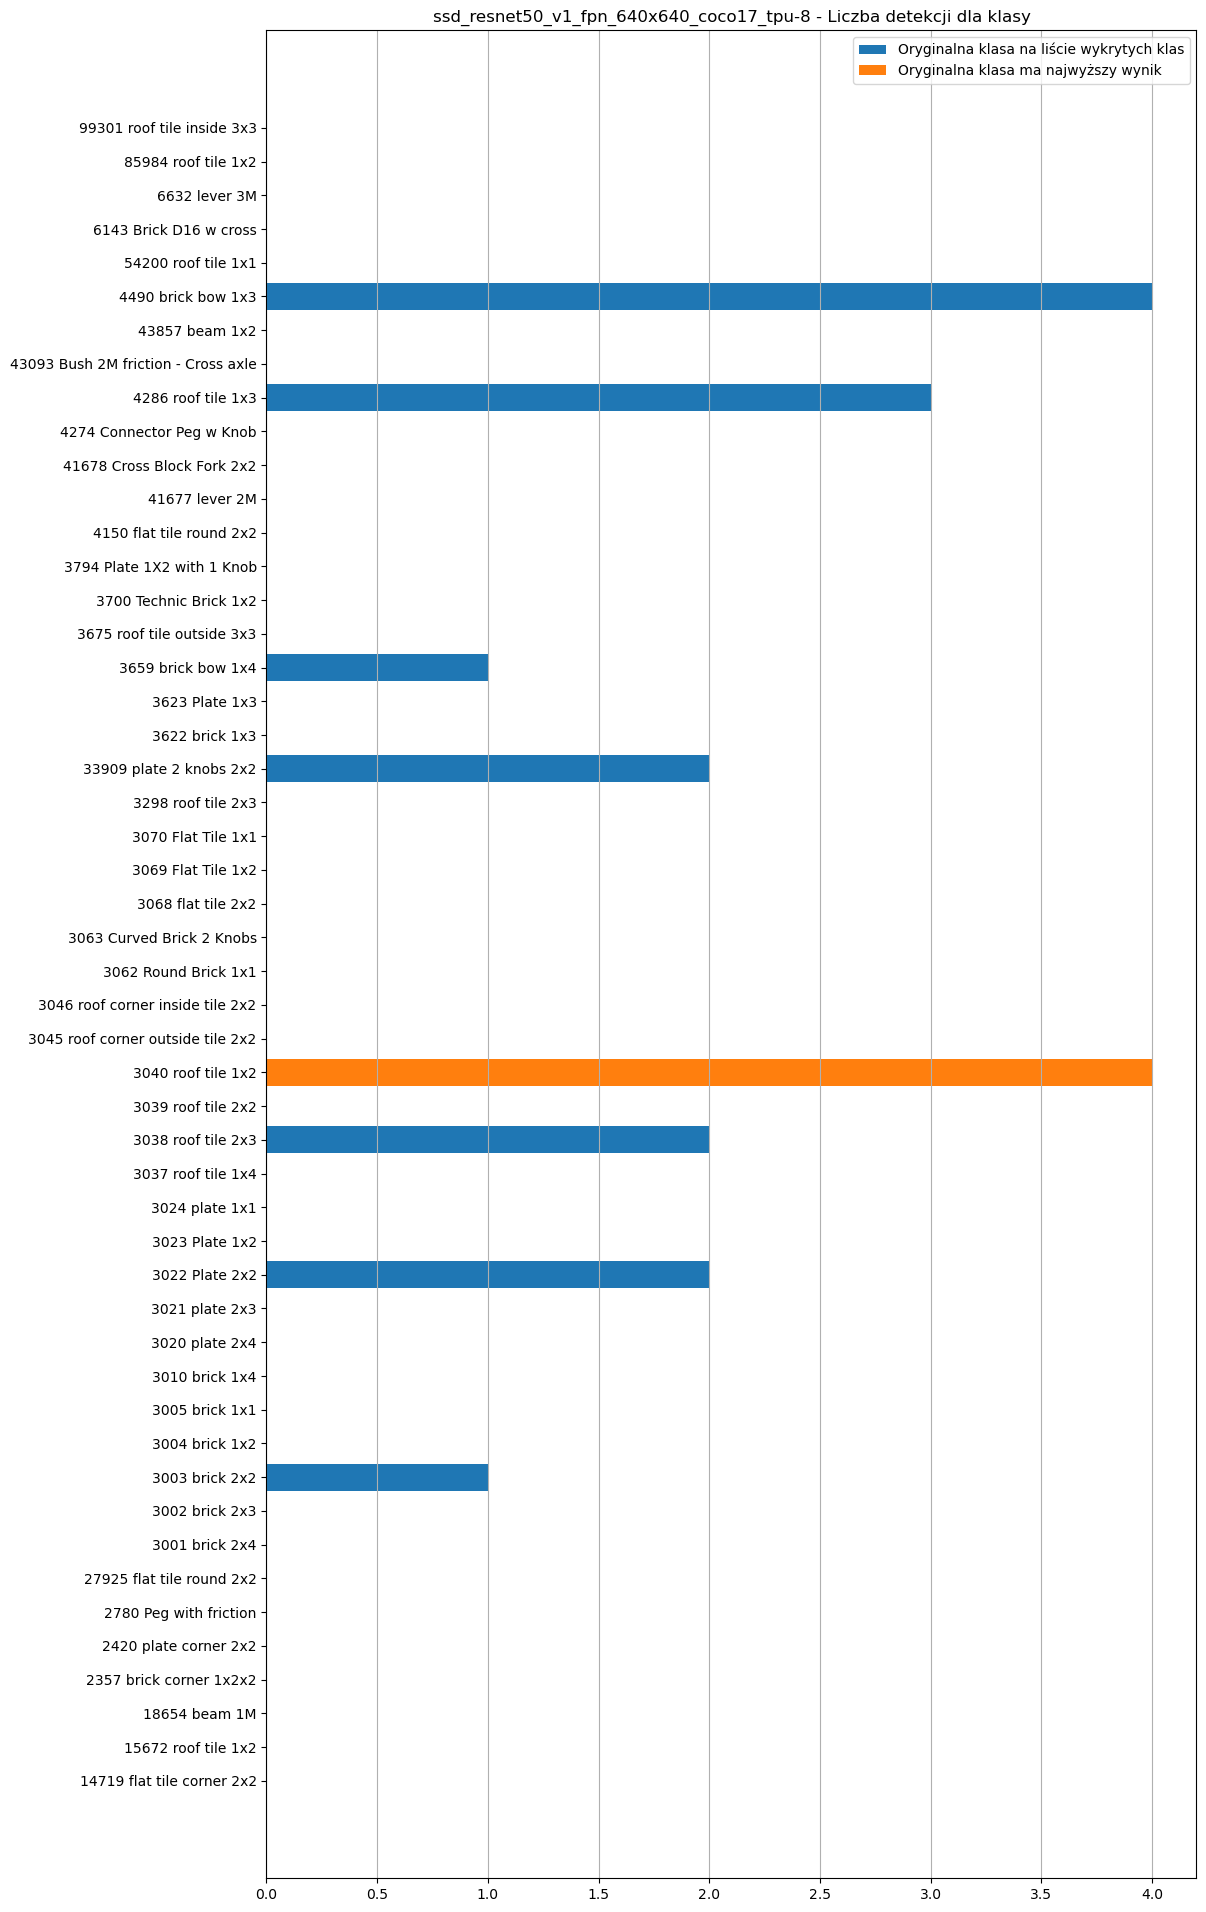

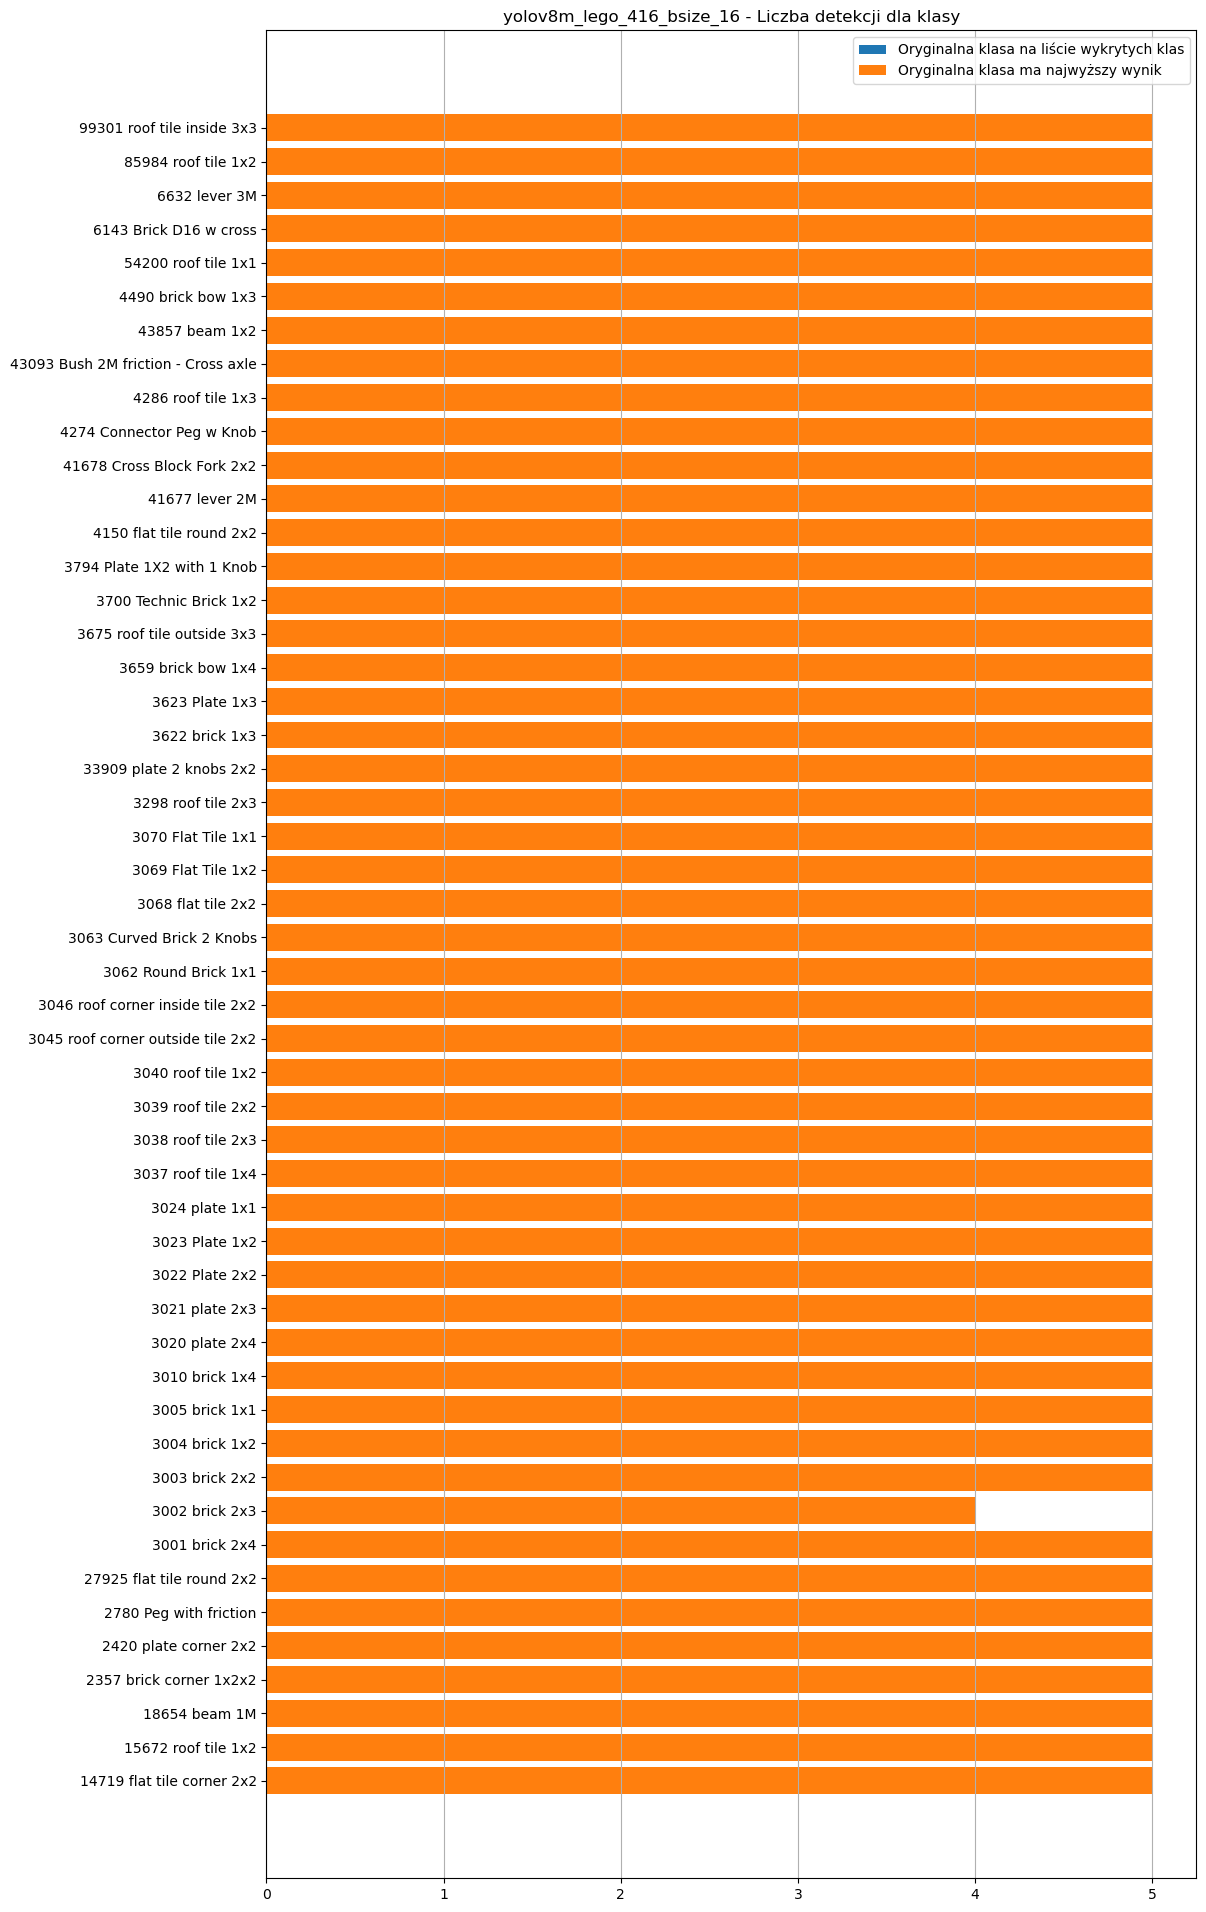

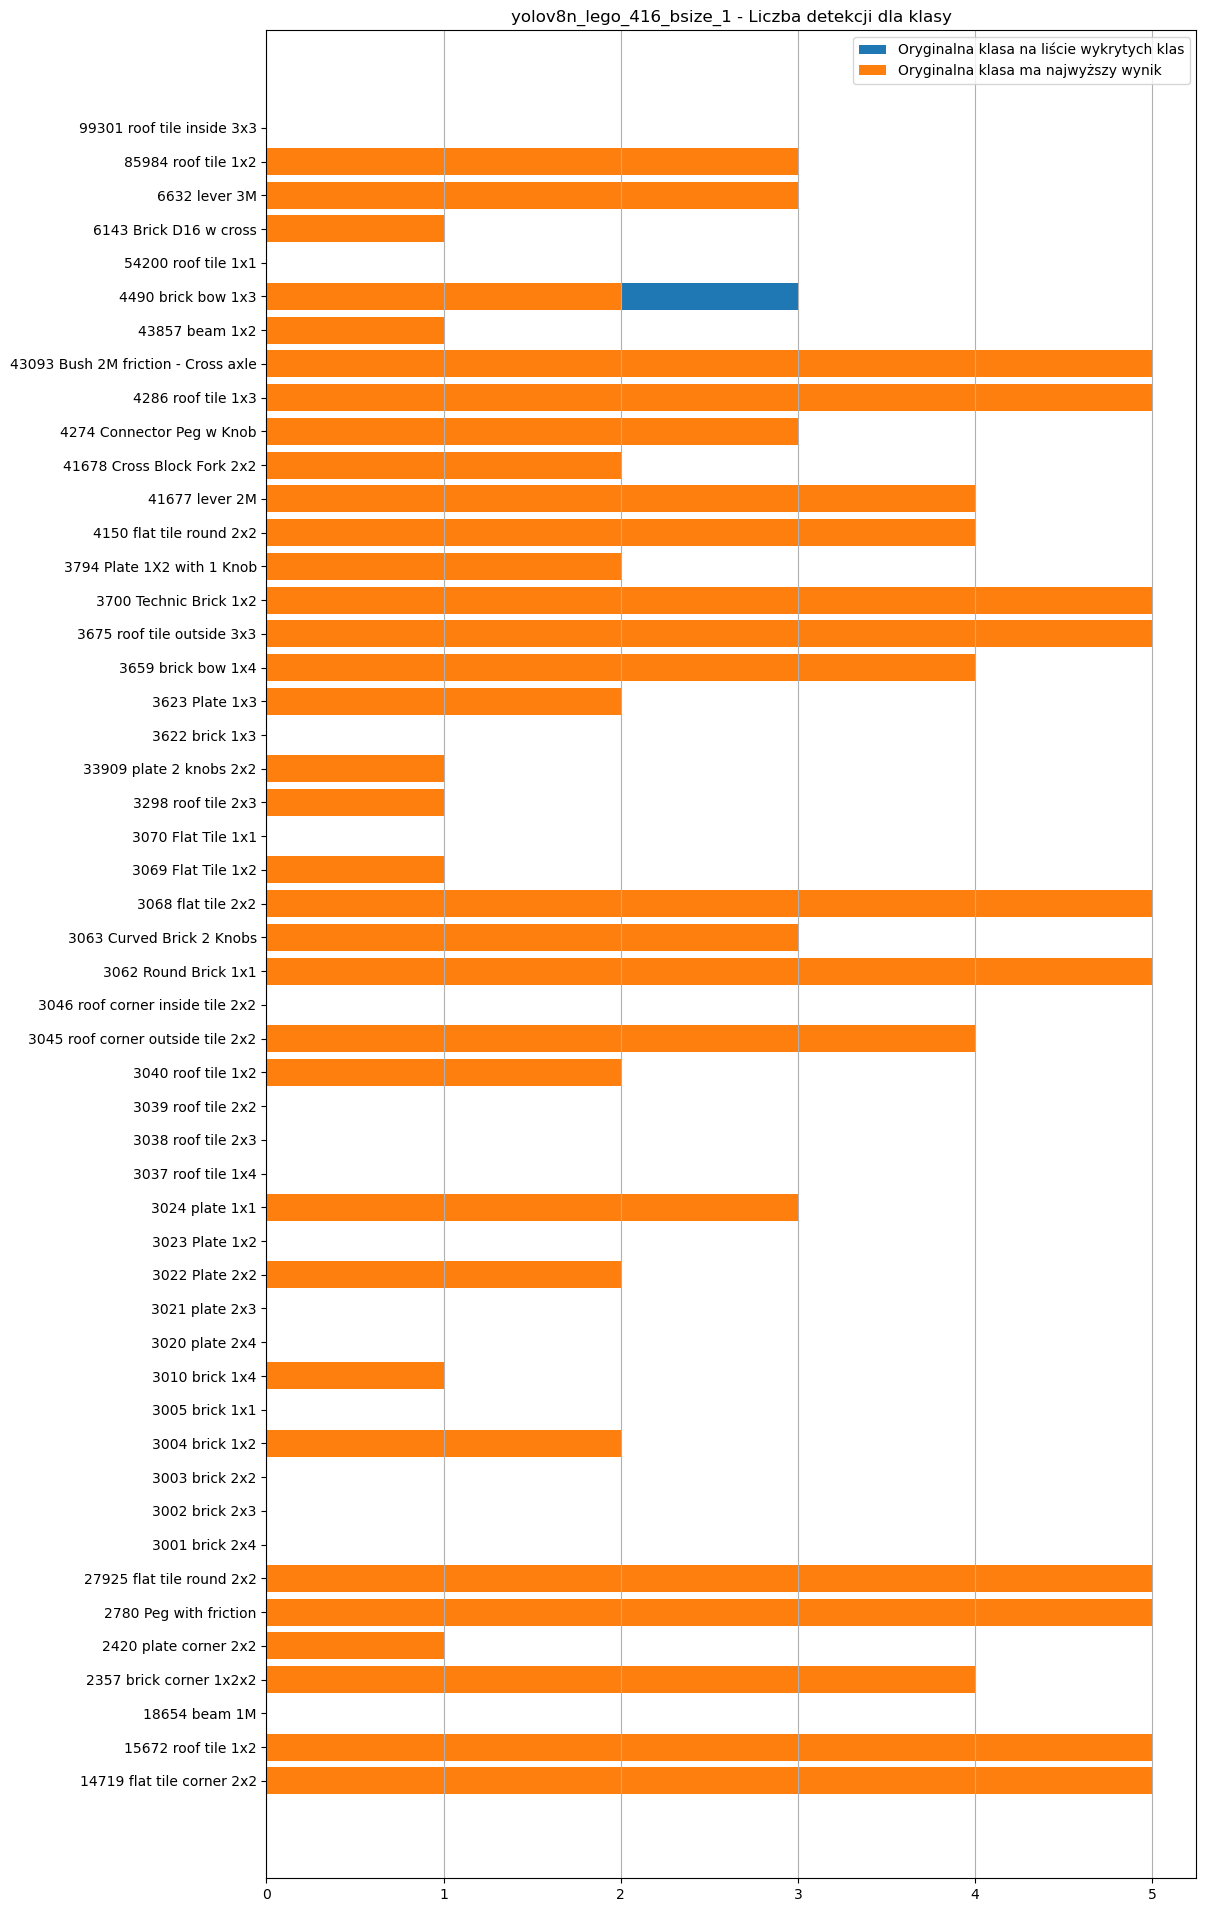

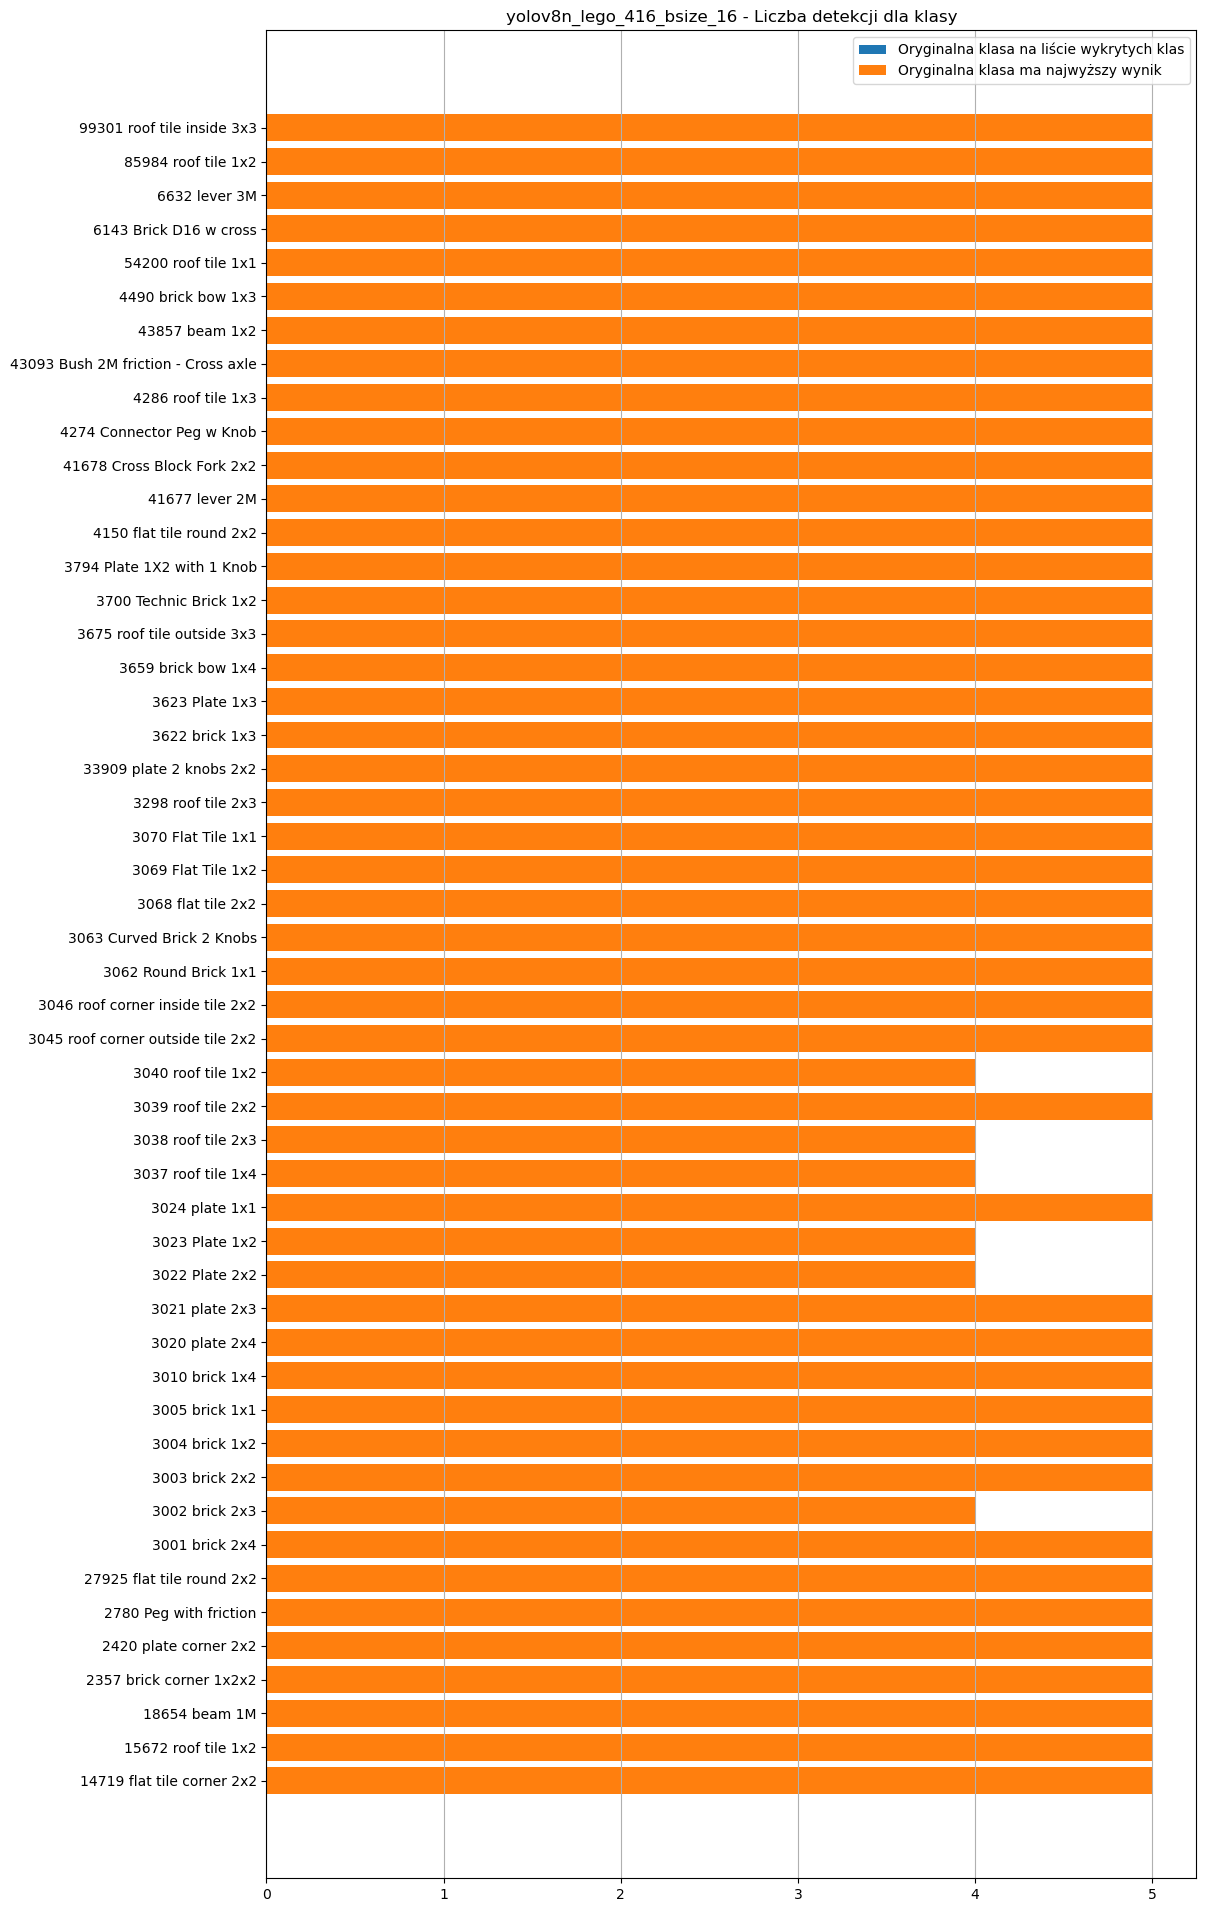

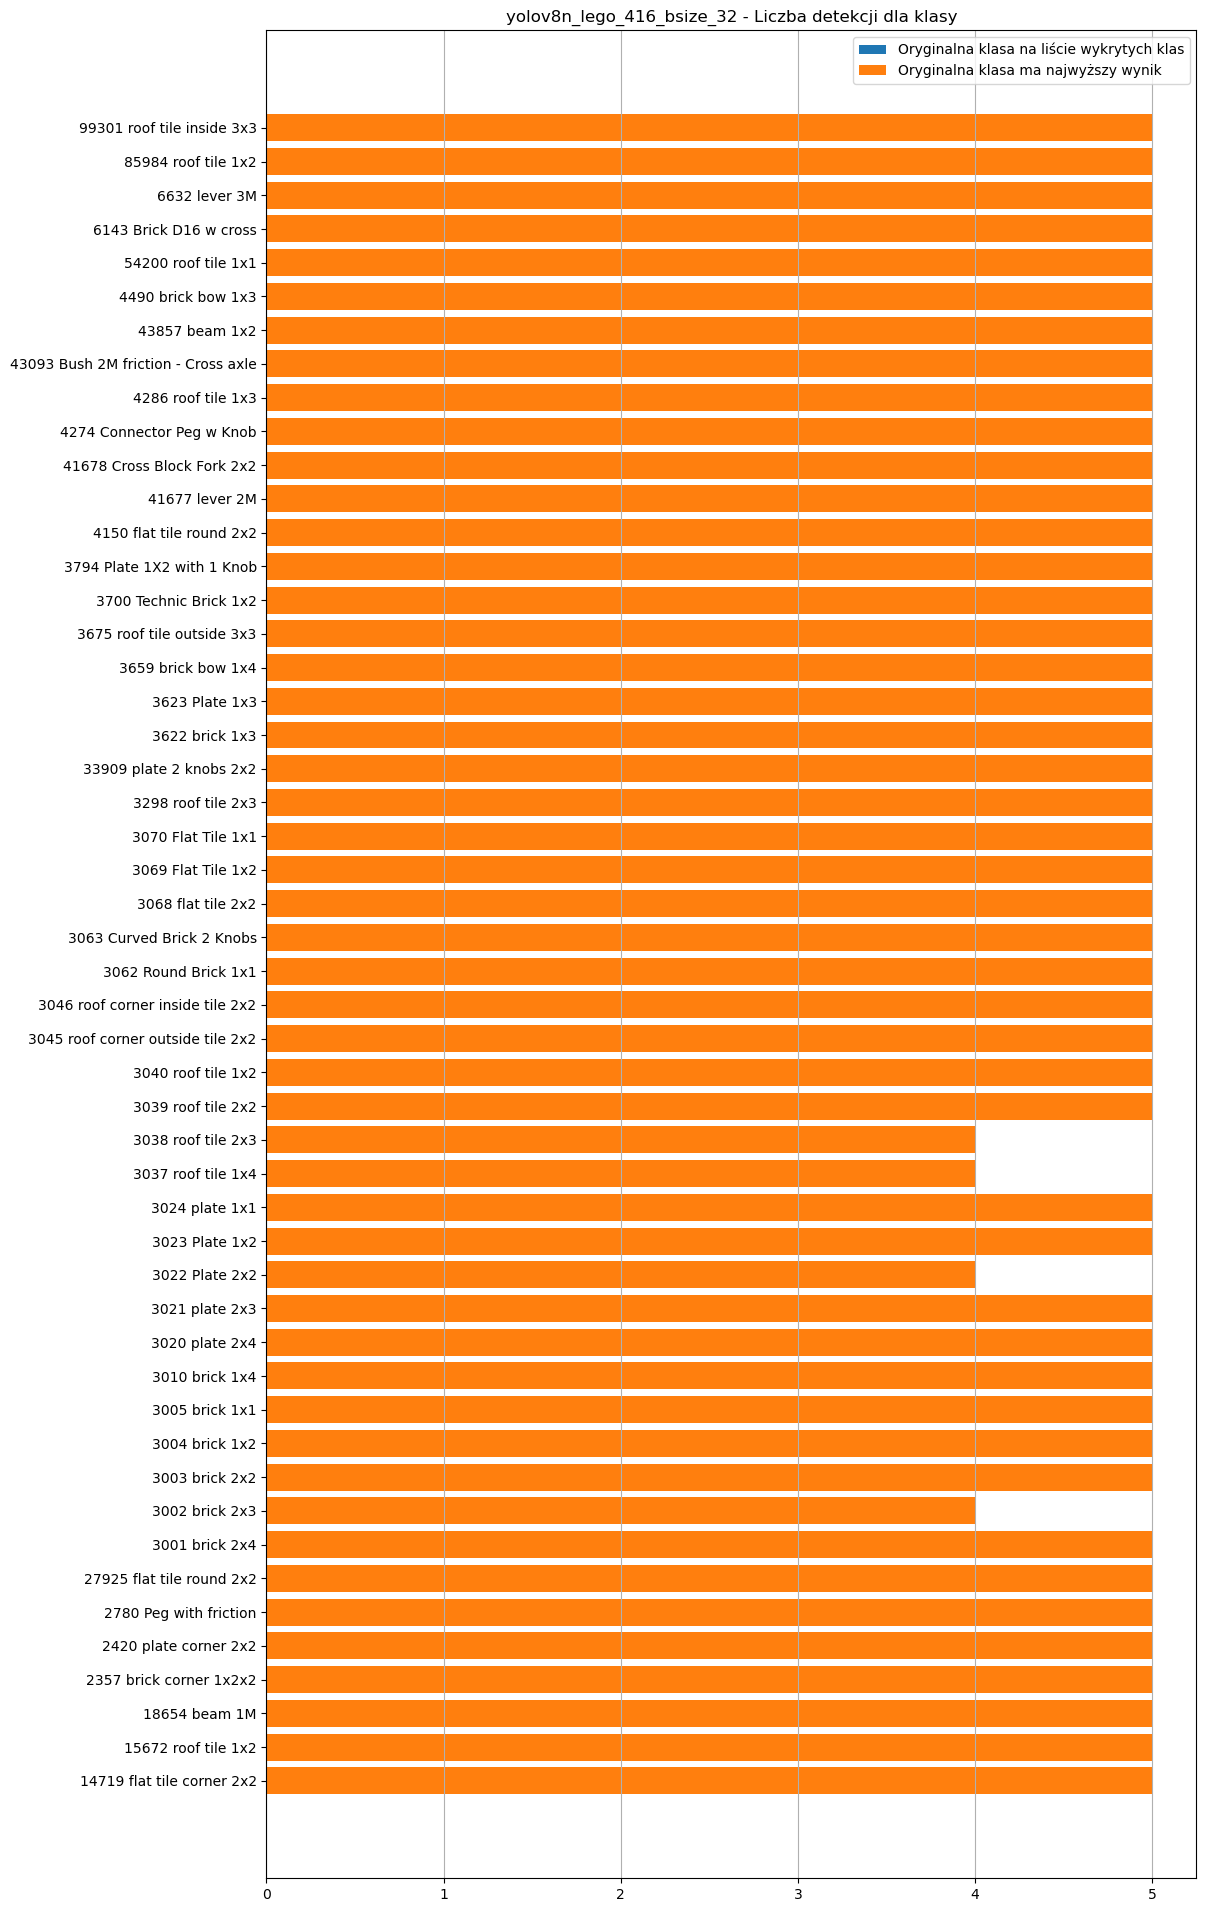

In [6]:
for model in models:
    generate_bars(os.path.join("workspace", "exported_models", model))

In [48]:
df = pd.read_csv(os.path.join("workspace", "exported_models", "yolov8n_lego_416_bsize_1", "validation_results.csv"))
df = df[df['class_present']]
df['boxes'] = [*map(ast.literal_eval, df.boxes.tolist())]
df["original_class"] = df["image"].apply(lambda z: z[:-9])
df["class_is_best"] = df["best_class"] == df["original_class"]
df = df[df['class_is_best']]
df = df.reset_index(drop=True)
row = df[df['class_is_best']].iloc[20]
df

,image,time,boxes,best,best_class,class_present,class_score,original_class,class_is_best
0,2357 brick corner 1x2x2 011R.jpg,2155.875,"[[87, 91, 323, 309, 2357 brick corner 1x2x2, 1...",1.000000,2357 brick corner 1x2x2,True,1.000000,2357 brick corner 1x2x2,True
1,2357 brick corner 1x2x2 012R.jpg,19.971,"[[73, 109, 324, 306, 2357 brick corner 1x2x2, ...",1.000000,2357 brick corner 1x2x2,True,1.000000,2357 brick corner 1x2x2,True
2,2357 brick corner 1x2x2 014L.jpg,19.989,"[[73, 57, 327, 293, 2357 brick corner 1x2x2, 0...",0.995548,2357 brick corner 1x2x2,True,0.995548,2357 brick corner 1x2x2,True
3,2357 brick corner 1x2x2 021L.jpg,18.990,"[[78, 104, 315, 314, 2357 brick corner 1x2x2, ...",0.991595,2357 brick corner 1x2x2,True,0.991595,2357 brick corner 1x2x2,True
4,2420 plate corner 2x2 004R.jpg,18.988,"[[94, 113, 301, 271, 2420 plate corner 2x2, 0....",0.691008,2420 plate corner 2x2,True,0.691008,2420 plate corner 2x2,True
...,...,...,...,...,...,...,...,...,...
101,43093 Bush 2M friction - Cross axle 015R.jpg,18.989,"[[135, 118, 270, 285, 43093 Bush 2M friction -...",0.999837,43093 Bush 2M friction - Cross axle,True,0.999837,43093 Bush 2M friction - Cross axle,True
102,43857 beam 1x2 005R.jpg,17.989,"[[128, 106, 271, 294, 43857 beam 1x2, 0.999407...",0.999408,43857 beam 1x2,True,0.999408,43857 beam 1x2,True
103,85984 roof tile 1x2 001R.jpg,17.990,"[[107, 134, 267, 268, 85984 roof tile 1x2, 0.9...",0.964476,85984 roof tile 1x2,True,0.964476,85984 roof tile 1x2,True
104,85984 roof tile 1x2 010L.jpg,18.989,"[[114, 150, 281, 278, 85984 roof tile 1x2, 0.6...",0.681239,85984 roof tile 1x2,True,0.681239,85984 roof tile 1x2,True


In [49]:
row['boxes'] = [*filter(lambda z: z[-2] == row['original_class'], row['boxes'])][-1]
row['boxes']

[61, 94, 292, 318, '3045 roof corner outside tile 2x2', 0.9999368190765381]

In [53]:
with open(f"Z:/magisterka-ml/bricks/{row['image'][:-9]}/{'.'.join([*row['image'].split('.')[:-1],'json'])}", "r") as infile:
    metadata = json.load(infile)
gtbox = [metadata['bbox']['xmin'], metadata['bbox']['ymin'], metadata['bbox']['xmax'], metadata['bbox']['ymax']]

print("Pbox:", row['boxes'])
print('GTbox:', gtbox)

Pbox: [61, 94, 292, 318, '3045 roof corner outside tile 2x2', 0.9999368190765381]
GTbox: [63, 95, 288, 320]


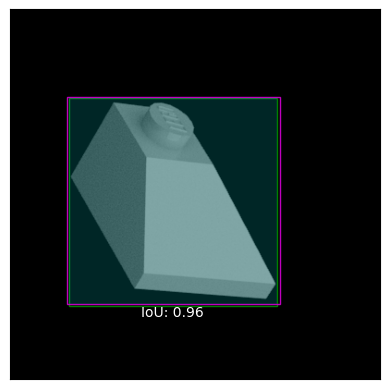

In [52]:
axes = plt.axes()
draw_intersection(f"bricks/{row['image'][:-9]}/{row['image']}", gtbox, row['boxes'], axes)